Small test of conversion from Relate format into tskit

In [1]:
%run ../scripts/notebook_settings_lean.py
import tskit

Setting up a haploid dataframe for relate runs

In [2]:
meta_data_samples = pd.read_csv("../data/Papio_metadata_with_clustering_sci.txt", sep =" ")
meta_data_samples

,PGDP_ID,Provider_ID,Provider,Genus,Species,Origin,Sex,address,longitude,latitude,callset_index,C_origin
0,Sci_16066,16066_3130,Rogers,Papio,cynocephalus,"Mikumi, Tanzania",F,"Mikumi, Kilosa, Morogoro, Coastal Zone, Tanzania",36.977032,-7.404852,0,"Cynocephalus, Central Tanzania"
1,Sci_16098,16098_5026,Rogers,Papio,cynocephalus,"Mikumi, Tanzania",F,"Mikumi, Kilosa, Morogoro, Coastal Zone, Tanzania",36.977032,-7.404852,1,"Cynocephalus, Central Tanzania"
2,Sci_30877,30877_3426,James Else,Papio,anubis,"Aberdare, Kenya",M,"Aberdare National Park, Nyeri, Central Kenya, ...",36.712451,-0.410251,2,"Anubis, Kenya"
3,Sci_30977,30977_3373,James Else,Papio,anubis,"Aberdare, Kenya",F,"Aberdare National Park, Nyeri, Central Kenya, ...",36.712451,-0.410251,3,"Anubis, Kenya"
4,Sci_34449,34449_BZ11022,Rogers/Jolly/Phillips-Conroy,Papio,kindae,"Chunga, Zambia",F,"Chunga, Mumbwa District, Central Province, Zambia",26.005210,-15.053557,4,"Kindae, Zambia"
...,...,...,...,...,...,...,...,...,...,...,...,...
222,PD_0790,34418_BZ11065,Rogers/Jolly/Phillips-Conroy,Papio,kindae,"Chunga, Zambia",F,"Chunga, Mumbwa District, Central Province, Zambia",26.005210,-15.053557,222,"Kindae, Zambia"
223,PD_0791,34419_BZ11066,Rogers/Jolly/Phillips-Conroy,Papio,kindae,"Chunga, Zambia",F,"Chunga, Mumbwa District, Central Province, Zambia",26.005210,-15.053557,223,"Kindae, Zambia"
224,PD_0792,34420_BZ11067,Rogers/Jolly/Phillips-Conroy,Papio,kindae,"Chunga, Zambia",F,"Chunga, Mumbwa District, Central Province, Zambia",26.005210,-15.053557,224,"Kindae, Zambia"
225,PD_0793,34422_BZ11070,Rogers/Jolly/Phillips-Conroy,Papio,kindae,"Chunga, Zambia",M,"Chunga, Mumbwa District, Central Province, Zambia",26.005210,-15.053557,225,"Kindae, Zambia"


In [3]:
mikumi_IDs = meta_data_samples.loc[meta_data_samples.Origin == "Mikumi, Tanzania"].PGDP_ID
pd.concat([mikumi_IDs, mikumi_IDs+"_a", mikumi_IDs+"_b"])

0      Sci_16066
1      Sci_16098
59       PD_0268
60       PD_0269
61       PD_0270
         ...    
203    PD_0771_b
204    PD_0772_b
205    PD_0773_b
206    PD_0774_b
207    PD_0775_b
Name: PGDP_ID, Length: 114, dtype: object

In [20]:
df_d = {}
for c in meta_data_samples.columns:
    df_d[c] = []
for i, row in meta_data_samples.iterrows():
    ID = row.PGDP_ID
    if row.Sex == "F":
        for r in row.index:
            if r == "PGDP_ID":
                df_d[r].append(ID + "_a")
                df_d[r].append(ID + "_b")
            else:
                df_d[r].append(row[r])
                df_d[r].append(row[r])
    else:
        for r in row.index:
            df_d[r].append(row[r])
haploid_meta_data = pd.DataFrame(df_d)

In [21]:
haploid_meta_data.to_csv("../data/haploid_metadata.txt", sep =" ", index=False)

Poplabels for Relate

In [6]:
#8 Cluster version
id_list = []
pop_list = []
group_list = []
sex_list = []
for i, row in meta_data_samples.iterrows():
    if row.PGDP_ID[0] != "P" and row.PGDP_ID[0] != "S":
        id_list.append("Sci_"+row.PGDP_ID)
    else:
        id_list.append(row.PGDP_ID)
    pop_list.append(row.C_origin)
    group_list.append(row.C_origin)
    if row.Sex == "F":
        sex_list.append("female")
    else:
        sex_list.append("male")

In [7]:
df_relate_pop = pd.DataFrame({"ID": id_list, "POP": pop_list, "GROUP": group_list, "SEX": sex_list})

In [8]:
relate_map = {"Cynocephalus, Central Tanzania": "Eastern_Yellow", "Anubis, Kenya": "Kenyan_Olive",
              "Kindae, Zambia": "Kindae", "Gelada, Captive": "Gelada", "Hamadryas, Ethiopia": "Hamadryas",
              "Anubis, Tanzania": "Tanzanian_Olive", "Cynocephalus, Western Tanzania": "Western_Yellow",
              "Papio, Senegal": "Papio", "Ursinus, Zambia": "Chacma", "Anubis, Ethiopia": "Ethiopian_Olive"}

In [9]:
df_relate_pop["POP"] = df_relate_pop["POP"].map(relate_map)
df_relate_pop["GROUP"] = df_relate_pop["GROUP"].map(relate_map)

In [10]:
df_relate_pop.loc[df_relate_pop.GROUP == "Gelada"]

,ID,POP,GROUP,SEX
6,Sci_38168,Gelada,Gelada,male
9,PD_0067,Gelada,Gelada,male


In [11]:
df_relate_pop_aut = df_relate_pop
df_relate_pop_aut.to_csv("/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/data/pops/all_inds_8cluster.sample",
                         sep=" ", index=False)

In [12]:
len(df_relate_pop_aut.loc[df_relate_pop_aut.GROUP == "Ethiopian_Olive"])

25

In [13]:
df_relate_pop_xfem = df_relate_pop.loc[(df_relate_pop.SEX == "female")
                  & (df_relate_pop.POP != "Kenyan_Olive")]
df_relate_pop_xfem.to_csv("/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/data/pops/all_females_8cluster.sample",
                          sep=" ", index=False)

In [14]:
sample_map = {}
for i, row in df_relate_pop_aut.iterrows():
    ID = row.ID
    if row.SEX == "female":
        for r in row.index:
            if r == "ID":
                sample_map[ID + "_1"] = ID + "_a"
                sample_map[ID + "_2"] = ID + "_b"
    else:
        for r in row.index:
            if r == "ID":
                sample_map[ID ] = ID

In [15]:
df_d = {}
for c in df_relate_pop_aut.columns:
    df_d[c] = []
for i, row in df_relate_pop_aut.iterrows():
    ID = row.ID
    if row.SEX == "female":
        for r in row.index:
            if r == "ID":
                df_d[r].append(ID + "_1")
                df_d[r].append(ID + "_2")
            else:
                df_d[r].append(row[r])
                df_d[r].append(row[r])
    else:
        for r in row.index:
            df_d[r].append(row[r])
haploid_poplabels = pd.DataFrame(df_d)

In [17]:
haploid_poplabels_s = haploid_poplabels.sort_values(by="ID")

In [18]:
haploid_poplabels_s.SEX = 1 # haploid poplabel
haploid_poplabels_s.ID = haploid_poplabels.ID.map(sample_map)

In [19]:
haploid_poplabels

,ID,POP,GROUP,SEX
0,Sci_16066_1,Eastern_Yellow,Eastern_Yellow,female
1,Sci_16066_2,Eastern_Yellow,Eastern_Yellow,female
2,Sci_16098_1,Eastern_Yellow,Eastern_Yellow,female
3,Sci_16098_2,Eastern_Yellow,Eastern_Yellow,female
4,Sci_30877,Kenyan_Olive,Kenyan_Olive,male
...,...,...,...,...
321,PD_0791_2,Kindae,Kindae,female
322,PD_0792_1,Kindae,Kindae,female
323,PD_0792_2,Kindae,Kindae,female
324,PD_0793,Kindae,Kindae,male


In [18]:
pd.DataFrame({"ID_old": sample_map.keys(), "ID_new": sample_map.values()}).sort_values(by="ID_old").to_csv(
    "/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/data/pops/hapX_reheader.txt",
    sep=" ", index=False, header=False)

In [42]:
haploid_poplabels_s.loc[~haploid_poplabels_s.GROUP.isin(["Gelada"]) &
                       ~haploid_poplabels_s.ID.isin(["Sci_30977_a", "Sci_30977_b"])].to_csv("/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/data/pops/haploid_x_8cluster.sample",
                         sep=" ", index=False)
haploid_poplabels_s

,ID,POP,GROUP,SEX
15,PD_0067,Gelada,Gelada,1
16,PD_0199_a,Tanzanian_Olive,Tanzanian_Olive,1
17,PD_0199_b,Tanzanian_Olive,Tanzanian_Olive,1
18,PD_0200_a,Tanzanian_Olive,Tanzanian_Olive,1
19,PD_0200_b,Tanzanian_Olive,Tanzanian_Olive,1
...,...,...,...,...
10,Sci_34474_b,Kindae,Kindae,1
11,Sci_38168,Gelada,Gelada,1
12,Sci_97074_a,Hamadryas,Hamadryas,1
13,Sci_97074_b,Hamadryas,Hamadryas,1


Check of error in hapX: Conclusion: Have to remove "Sci_30977_a", "Sci_30977_b" (Kenyan Olive), which is ok.

In [26]:
sample_check = pd.read_csv("../steps/haps_sample/chromhapX.sample", sep="\t")
poplabel_check = pd.read_csv("../data/pops/haploid_x_8cluster.sample", sep=" ")

In [38]:
poplabel_check.loc[~poplabel_check.ID.isin(list(sample_check.ID_1))]

,ID,POP,GROUP,SEX
315,Sci_30977_a,Kenyan_Olive,Kenyan_Olive,1
316,Sci_30977_b,Kenyan_Olive,Kenyan_Olive,1


In [40]:
poplabel_check.loc[poplabel_check.POP == "Kenyan_Olive"]

,ID,POP,GROUP,SEX
314,Sci_30877,Kenyan_Olive,Kenyan_Olive,1
315,Sci_30977_a,Kenyan_Olive,Kenyan_Olive,1
316,Sci_30977_b,Kenyan_Olive,Kenyan_Olive,1


Tests of tskit in the converted relate dataset

In [2]:
ts = tskit.load("../steps/all_individuals_relate/chromX_tskit.trees")

In [3]:
ts.diversity()

0.0013148482961617984

In [4]:
first_tree = ts.first()

In [5]:
ts

In [6]:
ts.nodes()

In [7]:
s_max, s_min = 0, 100
for s in ts.at(136387268).samples():
    #print(s)
    if s > s_max:
        s_max = s
    if s < s_min:
        s_min = s
print(s_max, s_min)

195 0


In [8]:
98*2

196

In [9]:
test_tree = ts.at(136174464)

In [10]:
poplabels = pd.read_csv("../data/pops/all_females_8cluster.sample", sep=" ",
                        names=["i", "ID", "POP", "GROUP", "SEX"], header=0)

In [11]:
poplabels

,i,ID,POP,GROUP,SEX
0,0,Sci_16066,Eastern Yellow,Eastern Yellow,female
1,1,Sci_16098,Eastern Yellow,Eastern Yellow,female
2,4,Sci_34449,Kindae,Kindae,female
3,5,Sci_34474,Kindae,Kindae,female
4,7,Sci_97074,Hamadryas,Hamadryas,female
...,...,...,...,...,...
93,220,PD_0788,Kindae,Kindae,female
94,221,PD_0789,Kindae,Kindae,female
95,222,PD_0790,Kindae,Kindae,female
96,223,PD_0791,Kindae,Kindae,female


In [12]:
d_west_mapping = {}
for i, row in poplabels.iterrows():
    if row.GROUP == "Western Yellow":
        d_west_mapping[i*2] = "W"
        d_west_mapping[i*2+1] = "W"

In [13]:
d_east_mapping = {}
for i, row in poplabels.iterrows():
    if row.GROUP == "Eastern Yellow":
        d_east_mapping[i*2] = "E"
        d_east_mapping[i*2+1] = "E"

In [14]:
d_to_mapping = {}
for i, row in poplabels.iterrows():
    if row.GROUP == "Tanzanian Olive":
        d_to_mapping[i*2] = "T"
        d_to_mapping[i*2+1] = "T"

In [15]:
d_k_mapping = {}
for i, row in poplabels.iterrows():
    if row.GROUP == "Kindae":
        d_k_mapping[i*2] = "K"
        d_k_mapping[i*2+1] = "K"

In [16]:
d_west_mapping

{48: 'W', 49: 'W', 110: 'W', 111: 'W', 112: 'W', 113: 'W'}

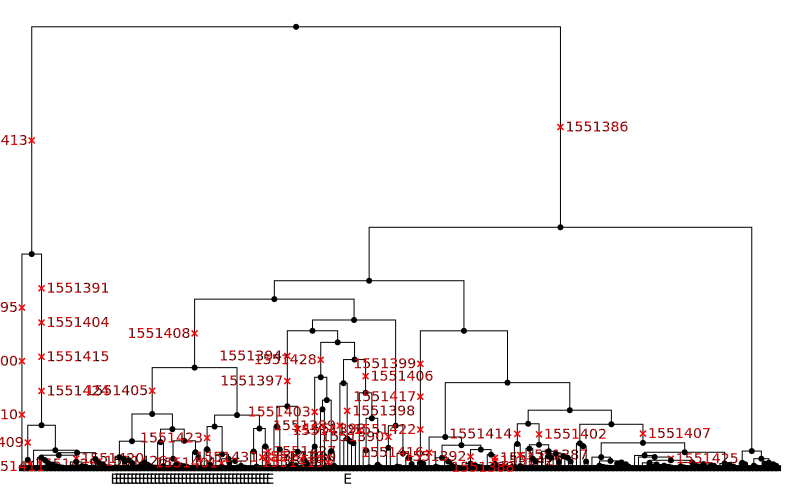

In [17]:
test_tree.draw_svg(size=(800,500), node_labels=d_east_mapping, order="tree")

In [18]:
# Setup based on poplabels
i_mapping = {}
for i, row in poplabels.iterrows():
    i_mapping[i*2] = row.GROUP
    i_mapping[i*2+1] = row.GROUP
poplabel_counts = poplabels["GROUP"].value_counts().to_dict()
highest_ID = poplabels.index.max()*2+1

In [19]:
poplabels.loc[poplabels.ID == "PD_0788"].index.values[0]

93

In [20]:
i_mapping

{0: 'Eastern Yellow',
 1: 'Eastern Yellow',
 2: 'Eastern Yellow',
 3: 'Eastern Yellow',
 4: 'Kindae',
 5: 'Kindae',
 6: 'Kindae',
 7: 'Kindae',
 8: 'Hamadryas',
 9: 'Hamadryas',
 10: 'Tanzanian Olive',
 11: 'Tanzanian Olive',
 12: 'Tanzanian Olive',
 13: 'Tanzanian Olive',
 14: 'Tanzanian Olive',
 15: 'Tanzanian Olive',
 16: 'Tanzanian Olive',
 17: 'Tanzanian Olive',
 18: 'Tanzanian Olive',
 19: 'Tanzanian Olive',
 20: 'Tanzanian Olive',
 21: 'Tanzanian Olive',
 22: 'Tanzanian Olive',
 23: 'Tanzanian Olive',
 24: 'Tanzanian Olive',
 25: 'Tanzanian Olive',
 26: 'Tanzanian Olive',
 27: 'Tanzanian Olive',
 28: 'Tanzanian Olive',
 29: 'Tanzanian Olive',
 30: 'Eastern Yellow',
 31: 'Eastern Yellow',
 32: 'Eastern Yellow',
 33: 'Eastern Yellow',
 34: 'Eastern Yellow',
 35: 'Eastern Yellow',
 36: 'Tanzanian Olive',
 37: 'Tanzanian Olive',
 38: 'Tanzanian Olive',
 39: 'Tanzanian Olive',
 40: 'Tanzanian Olive',
 41: 'Tanzanian Olive',
 42: 'Eastern Yellow',
 43: 'Eastern Yellow',
 44: 'Eastern 

In [23]:
highest_ID = poplabels.index.max()*2+1

In [24]:
lowest_depth = test_tree.depth(0)
for i in range(highest_ID):
    current_node = i
    if lowest_depth > test_tree.depth(current_node):
        lowest_depth = test_tree.depth(current_node)
        print(lowest_depth)

7
5
2


In [25]:
# Version which uses first coalescence
def naive_coalescence_ordering(tree, IDs, sample_counts):
    df_list = []
    for i in IDs:
        pop_list = []
        gen_list = []
        current_node = i
        while test_tree.depth(current_node) > 0:
            # Find parent node
            parent_node = test_tree.parent(current_node)
            # Determine children, and then pick alternate
            # cannot find a method for this, so I use an explicit if/else
            children = test_tree.children(parent_node)
            if current_node == children[0]:
                alt_node = children[1]
            else:
                alt_node = children[0]
            # Determine which populations are present under the alternate node
            alt_samples = pd.Series([x for x in test_tree.samples(alt_node)])
            set_of_pops = set(alt_samples.map(i_mapping))
            # If pop is not already added to list, add pop and note coal time
            for p in set_of_pops:
                if p  not in pop_list:
                    pop_list.append(p)
                    gen_list.append(test_tree.time(current_node))
            current_node = parent_node
        d = {"ID": i, "sites": tree.num_sites, "span": tree.span, "start": tree.interval[0]}
        for i in range(len(pop_list)):
            d["coal_{}".format(i)] = pop_list[i]
        for i in range(len(gen_list)):
            d["coal_date_{}".format(i)] = gen_list[i]
        df_list.append(pd.DataFrame(d, index=[i]))
    return pd.concat(df_list)

In [26]:
# Version which counts number of samples, and only notes as coalescence if over 50 % of pop is coalesced.
def coalescence_ordering(tree, IDs, sample_counts):
    df_list = []
    for i in IDs:
        pop_list = []
        gen_list = []
        coal_counts = {}
        for p in sample_counts.index:
            coal_counts[p] = 0
        current_node = i
        while tree.depth(current_node) > 0:
            # Find parent node
            parent_node = tree.parent(current_node)
            # Determine children, and then pick alternate
            # cannot find a method for this, so I use an explicit if/else
            children = tree.children(parent_node)
            if current_node == children[0]:
                alt_node = children[1]
            else:
                alt_node = children[0]
            # Determine which populations are present under the alternate node
            alt_samples = pd.Series([x for x in tree.samples(alt_node)])
            alt_sample_counts = alt_samples.map(i_mapping).value_counts()
            for p in alt_sample_counts.index:
                coal_counts[p] += alt_sample_counts[p]
            # If pop is not already added to list, add pop and note coal time
            for p in alt_sample_counts.index:
                if p  not in pop_list and coal_counts[p] > sample_counts[p]/2:
                    pop_list.append(p)
                    gen_list.append(tree.time(current_node))
            current_node = parent_node
        d = {"ID": i, "sites": tree.num_sites, "span": tree.span, "start": tree.interval[0]}
        for i in range(len(pop_list)):
            d["coal_{}".format(i)] = pop_list[i]
        for i in range(len(gen_list)):
            d["coal_date_{}".format(i)] = gen_list[i]
        df_list.append(pd.DataFrame(d, index=[i]))
    return pd.concat(df_list)

In [27]:
list(i_mapping.keys())[100:102]

[100, 101]

In [28]:
%%timeit -n 10
c = 0
ID_list = list(i_mapping.keys())[10:12]
sample_counts = poplabels["GROUP"].value_counts()*2
for tree in ts.trees():
    if c >= 1:
        break
    df = naive_coalescence_ordering(tree, ID_list, sample_counts)
    c += 1

305 ms ± 4.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [29]:
%%timeit -n 10
c = 0
ID_list = list(i_mapping.keys())[10:12]
sample_counts = poplabels["GROUP"].value_counts()*2
for tree in ts.trees():
    if c >= 1:
        break
    df = coalescence_ordering(tree, ID_list, sample_counts)
    c += 1

308 ms ± 2.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [31]:
c = 0
ID_list = list(i_mapping.keys())[10:12]
sample_counts = poplabels["GROUP"].value_counts()*2
df_list = []
for tree in ts.trees():
    df = coalescence_ordering(tree, ID_list, sample_counts)
    if c % 2500 == 0:
        print(c)
    c += 1
    df_list.append(df)
test_df = pd.concat(df_list)

0
2500
5000
7500
10000
12500
15000
17500
20000
22500
25000
27500
30000
32500
35000
37500
40000
42500
45000
47500
50000
52500
55000
57500
60000
62500
65000
67500
70000
72500
75000
77500
80000
82500
85000
87500
90000
92500
95000
97500
100000
102500
105000
107500
110000
112500
115000
117500


Reading in the df from the analysis workflow.

In [ ]:
import glob
df_l = []
for p in glob.glob("../steps/relate_coal_ordering/PD*"):
    print(p)
    df_l.append(pd.read_csv(p))
full_df = pd.concat(df_l)

../steps/relate_coal_ordering/PD_0272.txt
../steps/relate_coal_ordering/PD_0737.txt
../steps/relate_coal_ordering/PD_0730.txt
../steps/relate_coal_ordering/PD_0209.txt
../steps/relate_coal_ordering/PD_0503.txt
../steps/relate_coal_ordering/PD_0745.txt
../steps/relate_coal_ordering/PD_0200.txt
../steps/relate_coal_ordering/PD_0770.txt
../steps/relate_coal_ordering/PD_0685.txt
../steps/relate_coal_ordering/PD_0232.txt
../steps/relate_coal_ordering/PD_0653.txt
../steps/relate_coal_ordering/PD_0682.txt
../steps/relate_coal_ordering/PD_0240.txt
../steps/relate_coal_ordering/PD_0693.txt
../steps/relate_coal_ordering/PD_0199.txt
../steps/relate_coal_ordering/PD_0694.txt
../steps/relate_coal_ordering/PD_0224.txt


In [ ]:
full_df

In [ ]:
full_df.loc[full_df.sites == full_df.sites.max()]

In [ ]:
ts.at(140195283).draw_svg(size=(800,500), node_labels=d_to_mapping, order="tree")

In [ ]:
sns.histplot(data=full_df, x="coal_date_0", hue="coal_0")

In [ ]:
sns.histplot(data=full_df, x="sites")

In [ ]:
subset_df = full_df.loc[(full_df.sites > 30) & (full_df.ID == 10)]
id_df = full_df.loc[(full_df.ID == 10)]

In [ ]:
id_df

In [ ]:
subset_df

In [ ]:
sns.scatterplot(data=subset_df, y="coal_date_0", x="start", hue="coal_0")

In [ ]:
tree.draw_svg(size=(800,500), node_labels=d_k_mapping, order="tree")

In [ ]:
for current_node in test_tree.nodes(i):
    print(current_node)